In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [72]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_set=train_generator= train_datagen.flow_from_directory(
    'train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'

)

Found 23998 images belonging to 2 classes.


In [73]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator= train_datagen.flow_from_directory(
    'validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'

)

Found 1002 images belonging to 2 classes.


In [74]:
test_set = test_datagen.flow_from_directory('test1',
                                            target_size=(150,150),
                                            batch_size=32,
                                            shuffle=False)

Found 12500 images belonging to 1 classes.


In [75]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a neural net
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    #sigmoid because only 2 classes
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [76]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=55,
                              validation_steps=50,
                              verbose=2)

Epoch 1/55
100/100 - 54s - loss: 0.7129 - accuracy: 0.5725 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/55
100/100 - 59s - loss: 0.6732 - accuracy: 0.5930 - val_loss: 0.7111 - val_accuracy: 0.5000
Epoch 3/55
100/100 - 56s - loss: 0.6534 - accuracy: 0.6155 - val_loss: 0.7767 - val_accuracy: 0.5040
Epoch 4/55
100/100 - 52s - loss: 0.6459 - accuracy: 0.6205 - val_loss: 0.6651 - val_accuracy: 0.5990
Epoch 5/55
100/100 - 48s - loss: 0.6398 - accuracy: 0.6415 - val_loss: 0.6671 - val_accuracy: 0.6360
Epoch 6/55
100/100 - 52s - loss: 0.6281 - accuracy: 0.6245 - val_loss: 0.6702 - val_accuracy: 0.6030
Epoch 7/55
100/100 - 55s - loss: 0.6161 - accuracy: 0.6625 - val_loss: 0.6216 - val_accuracy: 0.6460
Epoch 8/55
100/100 - 54s - loss: 0.6230 - accuracy: 0.6365 - val_loss: 0.6166 - val_accuracy: 0.6610
Epoch 9/55
100/100 - 49s - loss: 0.5987 - accuracy: 0.6525 - val_loss: 0.6706 - val_accuracy: 0.6050
Epoch 10/55
100/100 - 45s - loss: 0.5937 - accuracy: 0.6830 - val_loss: 0.6080 - val_accura

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 74, 74, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 36, 36, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)       

Text(0.5, 1.0, 'Training and validation loss')

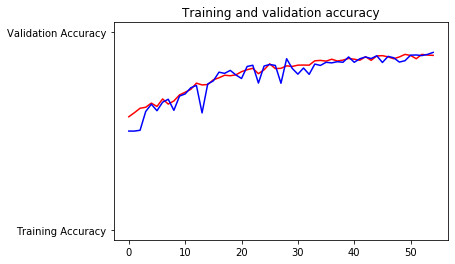

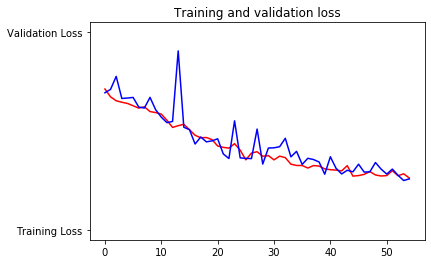

In [79]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

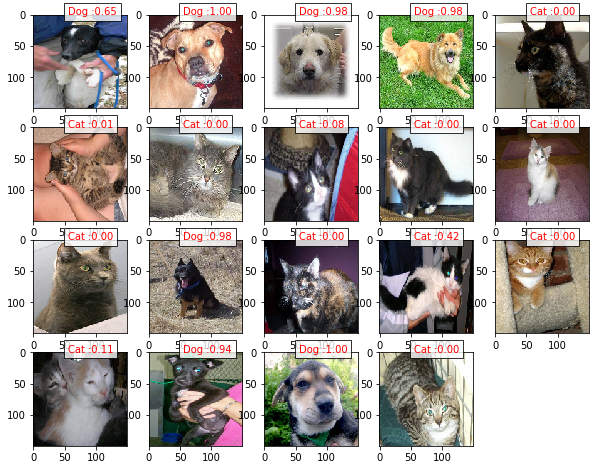

In [94]:
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1,20):
    img = image.load_img('test1/images/'+str(i)+'.jpg',target_size=(150,150,3))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    img= image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction=model.predict(img)
    if prediction>0.5:
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))